In [1]:
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from tensorflow.keras.optimizers import Adam

def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(1920,1080))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tensorflow.keras.applications.InceptionV3.preprocess_input(img_array_expanded_dims)


In [2]:
base_model=tensorflow.keras.applications.InceptionV3(weights='imagenet',include_top=False,input_shape = (1920,1080,3)) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(4,activation='softmax')(x) #final layer with softmax activation
model=Model(inputs=base_model.input,outputs=preds)

for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

87924736/87910968 [==============================] - 3s 0us/step


In [7]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('output_full_res/train',
                                                 target_size=(1920,1080),
                                                 color_mode='rgb',
                                                 batch_size=2,
                                                 class_mode='categorical',
                                                 shuffle=True)

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size

Found 16000 images belonging to 4 classes.


In [8]:
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

C:\Users\pavan\AppData\Local\Temp/ipykernel_20108/940337320.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/10
8000/8000 [==============================] - 2262s 282ms/step - loss: 1.3892 - accuracy: 0.2494
Epoch 2/10
8000/8000 [==============================] - 2230s 279ms/step - loss: 1.3862 - accuracy: 0.2497
Epoch 3/10
8000/8000 [==============================] - 2187s 273ms/step - loss: 0.8814 - accuracy: 0.4691
Epoch 4/10
8000/8000 [==============================] - 2152s 269ms/step - loss: 0.7431 - accuracy: 0.4794
Epoch 5/10
8000/8000 [==============================] - 2164s 270ms/step - loss: 0.7406 - accuracy: 0.4854
Epoch 6/10
8000/8000 [==============================] - 2148s 268ms/step - loss: 0.7378 - accuracy: 0.4877
Epoch 7/10
8000/8000 [==============================] - 2145s 268ms/step - loss: 0.7330 - accuracy: 0.4897
Epoch 8/10
8000/8000 [==============================] - 2212s 276ms/step - loss: 0.7356 - accuracy: 0.4975
Epoch 9/10
8000/8000 [==============================] - 2203s 275ms/step - loss: 0.7024 - accuracy: 0.5486
Epoch 10/10
8000/8000 [==============

In [9]:
test_generator=train_datagen.flow_from_directory('output_full_res/test',
                                                 target_size=(1920,1080),
                                                 color_mode='rgb',
                                                 batch_size=1,
                                                 class_mode='categorical',
                                                 shuffle=True)

evaluate = model.evaluate_generator(generator=test_generator)

Found 4000 images belonging to 4 classes.


C:\Users\pavan\AppData\Local\Temp/ipykernel_20108/851691716.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluate = model.evaluate_generator(generator=test_generator)


In [30]:
from tqdm.notebook import tqdm

In [ ]:
y_pred = []
for i in tqdm(test_generator):
    pred = model.predict(i[0])
    label = np.argmax(pred)
    y_pred.append(label)

In [34]:
y_pred = y_pred[:4000]

In [35]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.metrics import confusion_matrix, classification_report

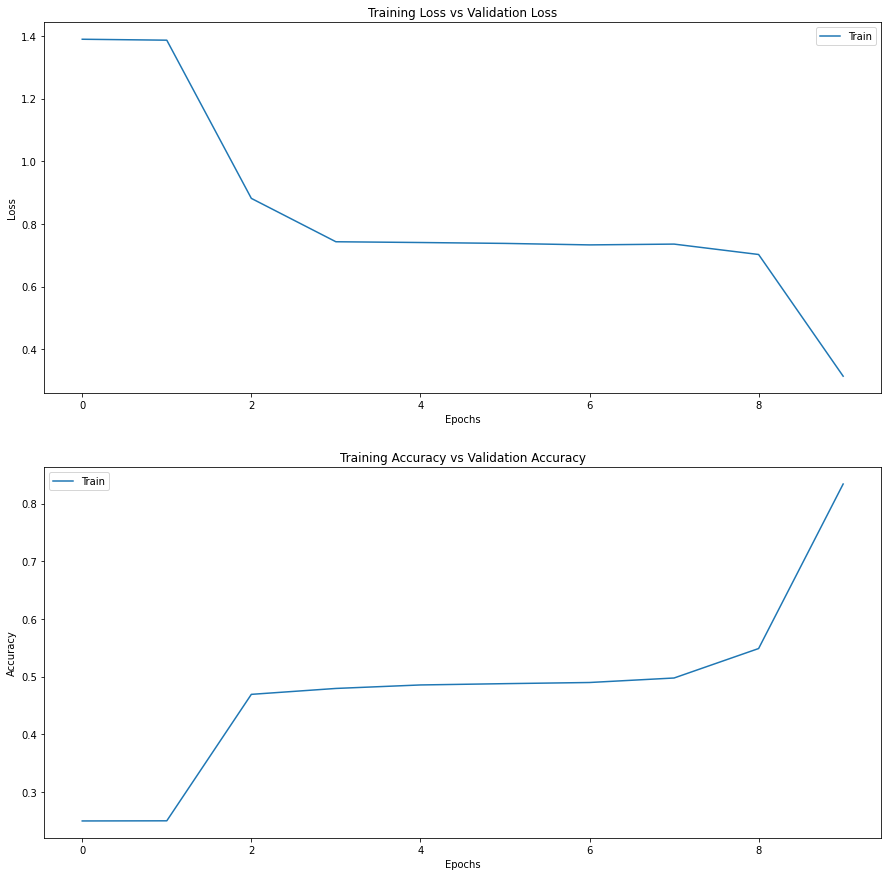

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
#axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])
axs[1].plot(history.history['accuracy'])
#axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [18]:

def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(1920, 1080))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor
  
#img_path = 'C:/Users/Ferhat/Python Code/Workshop/Tensoorflow transfer learning/blue_tit.jpg'
img_path = 'img11.png'
new_image = load_image(img_path)

pred = model.predict(new_image)

pred

array([[5.8515429e-34, 2.0595681e-35, 9.8373607e-07, 9.9999905e-01]],
      dtype=float32)